In [316]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
import ast, seaborn as sns
from adjustText import adjust_text
from datetime import datetime as dt
from matplotlib.ticker import FuncFormatter
from datasets import load_dataset


#setup
dataset = load_dataset('lukebarousse/data_jobs')
csv = dataset['train'].to_pandas()
csv["job_posted_date"] = pd.to_datetime(csv["job_posted_date"])
csv['job_skills'] = csv['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
csv_DA = csv[csv['job_country'] == 'United States'] #US jobs only


In [317]:
csv_DA = csv_DA[csv_DA['job_title_short'] == 'Data Analyst'].copy()

In [318]:
csv_DA['job_posted_month_no'] = csv_DA['job_posted_date'].dt.month

In [319]:
csv_DA_explode = csv_DA.explode('job_skills')

In [320]:
csv_DA_pivot = csv_DA_explode.pivot_table(
    index='job_posted_month_no',
    columns='job_skills',
    aggfunc='size',
    fill_value=0 # to fill NaN values with 0
)

In [321]:
csv_DA_pivot.loc['total'] = csv_DA_pivot.sum()

In [322]:
csv_DA_pivot = csv_DA_pivot[csv_DA_pivot.loc['total'].sort_values(ascending=False).index]

In [323]:
csv_DA_pivot.drop('total', inplace=True)

In [324]:
csv_DA_pivot = csv_DA_pivot.iloc[:, :5].copy()

In [325]:
DA_totals = csv_DA.groupby('job_posted_month_no').size()

In [326]:
csv_DA_perc = csv_DA_pivot.div(DA_totals, axis=0) * 100

In [327]:
csv_DA_perc.reset_index(inplace=True)

In [328]:
csv_DA_perc['job_posted_month'] = csv_DA_perc['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m')).dt.strftime('%b')

In [329]:
csv_DA_perc.set_index('job_posted_month', inplace=True)
csv_DA_perc.drop('job_posted_month_no', axis=1, inplace=True)
csv_DA_perc

job_skills,sql,excel,tableau,python,sas
job_posted_month,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166
Feb,51.730895,42.243632,27.367734,26.420640,19.790986
Mar,51.881634,42.795111,29.012544,27.066581,19.909939
Apr,53.231939,42.139197,29.575136,27.756654,21.524219
May,51.692369,42.419387,28.680152,27.017825,19.467254
Jun,50.360725,41.914482,28.646841,28.312511,17.314799
Jul,50.163430,40.722938,29.475101,27.648529,19.150163
Aug,51.462165,41.166717,29.409105,30.524570,19.234248
Sep,49.471869,38.823022,29.165768,26.492779,18.452253


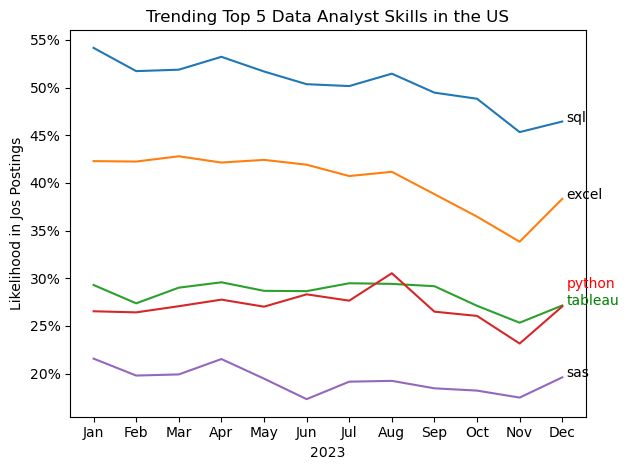

In [339]:
csv_plot = csv_DA_perc.copy()
ax = sns.lineplot(data=csv_plot, dashes=False, palette='tab10')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}%'))
plt.title('Trending Top 5 Data Analyst Skills in the US')
plt.xlabel('2023')
plt.ylabel('Likelihood in Jos Postings')
plt.legend().remove()

for i in range(5):
    if i == 2:
        plt.text(11.1, csv_plot.iloc[-1, i], csv_plot.columns[i], color='green')
    elif i == 3:
         plt.text(11.1, csv_plot.iloc[-1, i]+1.6, csv_plot.columns[i], va='bottom', ha='left', color='red')
    else:
        plt.text(11.1, csv_plot.iloc[-1, i], csv_plot.columns[i])
        

plt.tight_layout()